## A - analyse de Distribution Univariée

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('nba_sb2.csv', sep=';', index_col='player')

In [2]:
df.head()

,pos,age,bref_team_id,g,gs,mp,fg.,efg.,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,po,conf
player,,,,,,,,,,,,,,,,,,,,
Steven Adams,C,20,OKC,81,20,1197,0.503,0.503,0.581,142,190,332,43,40,57,71,203,265,F,West
Arron Afflalo,SG,28,ORL,73,73,2552,0.459,0.522,0.815,32,230,262,248,35,3,146,136,1330,NP,West
Alexis Ajinca,C,25,NOP,56,30,951,0.546,0.546,0.836,94,183,277,40,23,46,63,187,328,NP,East
Cole Aldrich,C,25,NYK,46,2,330,0.541,0.541,0.867,37,92,129,14,8,30,18,40,92,NP,East
LaMarcus Aldridge,PF,28,POR,69,69,2498,0.458,0.459,0.822,166,599,765,178,63,68,123,147,1603,FT,West


Parmi les 21 variables, on a pour chaque joueur de NBA 2013-2014
- player : Prénom et Nom du joueur.
- age : L'âge du joueur au début de la saison.
- pos : Le poste du joueur au sein de son équipe: Meneur (PG: point guard), Arrière (SG: shooting guard), Pivot (C: center) etc...
- g : Nombre de matchs joués.
- gs : Nombre de matchs débutés.
- mp : Nombre de minutes jouées par saison.
- fg. : Pourcentage de field goals (paniers tirés autres que lancers francs) réussis
- tov : Nombre de récupérations de ballons.
- po : NP si l'équipe n'a pas atteint les playoffs, FT si elle a atteint les deux premiers tours des playoffs, F si elle a atteint la finale de sa conférence.
- conf : La "conférence" à laquelle l'équipe appartient (Est/Ouest).

- **pts = nbre de points marqués ( non dit ici mais question en fin sur cette variable !**

In [3]:
print("df.shape =",df.shape)
df.info()                            # shape et recherche catégories + NaN

df.shape = (40, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, Steven Adams to Bismack Biyombo
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pos           40 non-null     object 
 1   age           40 non-null     int64  
 2   bref_team_id  40 non-null     object 
 3   g             40 non-null     int64  
 4   gs            40 non-null     int64  
 5   mp            40 non-null     int64  
 6   fg.           40 non-null     float64
 7   efg.          40 non-null     float64
 8   ft.           40 non-null     float64
 9   orb           40 non-null     int64  
 10  drb           40 non-null     int64  
 11  trb           40 non-null     int64  
 12  ast           40 non-null     int64  
 13  stl           40 non-null     int64  
 14  blk           40 non-null     int64  
 15  tov           40 non-null     int64  
 16  pf            40 non-null     int64  
 17  pts           40 non-null     int64 

## 0 - Theme sns a utiliser
Par défaut, le thème utilisé pour le fond des graphiques est celui de Matplotlib.

Pour le remplacer par le thème par défaut de Seaborn, on utilise la commande sns.set_theme.
Plusieurs thèmes sont disponibles, plus de détails ici.

- (d) Exécuter la cellule suivante pour remplacer le thème par défaut de Seaborn.

In [4]:
## Exécuter pour activer le thème par défaut de Seaborn
sns.set_theme()

## 1 -  Variable continue => displot()
Lorsque l'on s'intéresse à une seule variable d'un DataFrame, on commence par analyser sa distribution.

Pour une variable numérique continue, le graphique le plus communément utilisé est l'histogramme.
La fonction displot de Seaborn permet de visualiser la distribution d'une variable continue en affichant un histogramme de la variable. Il est également possible d'ajouter l'estimation par noyau de sa densité.

Le seul argument obligatoire de cette fonction est la série/le vecteur/la liste contenant la variable que l'on souhaite visualiser.
Par défaut, les intervalles de l'histogramme sont calculés automatiquement, mais ils peuvent être fixés avec l'argument bins.
Si la séquence est un objet Pandas, le nom de la variable est automatiquement ajouté au label de l'axe sur lequel la variable est affichée.

- (e) Afficher la distribution de la variable age de df.

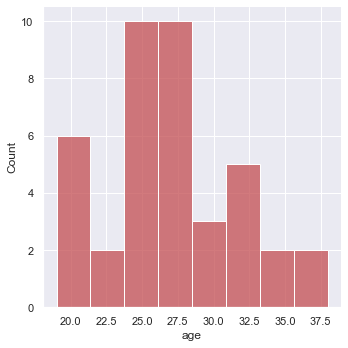

In [5]:
sns.displot(df.age, color='r');

La fonction displot permet en réalité d'afficher au choix un histogramme, une estimation de la densité par méthode de noyau, et/ou une fonction de répartition empirique (ECDF), grâce au paramètre kind qui prend respectivement en argument les valeurs "hist" (par défaut), "kde" et "ecdf".

En mode histogramme, il est possible d'ajouter une courbe d'estimation de la densité ou un rug plot (qui ajoute les points au graphique sous forme de petites tiges verticales), grâce aux arguments booléens kde et rug.

On peut fixer la couleur et l'orientation du graphique avec les paramètres color ou vertical.

- (f) Afficher à partir de la variable age, un histogramme sur 10 intervalles et un rug plot, de couleur rouge, avec l'estimation de la densité.

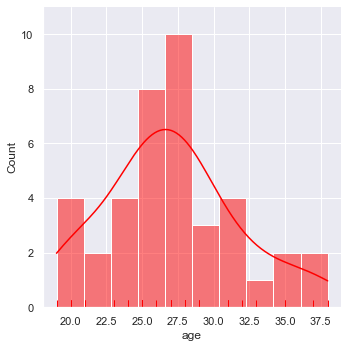

In [6]:
sns.displot(df.age, bins=10 ,kde=True, rug=True, color='red');

### displot()  shade, clip, cut, et kdeplot()
Il convient de noter que la fonction displot permet également de rajouter les arguments propres à une des fonctions qu'elle utilise dans un dictionnaire portant le nom : {hist, kde, ecdf}_kws.

Exemple :
sns.displot(df['var'], hist=True, kde= True, kde_kws ={'clip': (5, 15)})
Si l'on veut uniquement afficher la densité estimée, il est préférable d'utiliser directement la fonction kdeplot, qui permet plus de personnalisation.

Les arguments shade, clip et cut, par exemple, permettent respectivement de colorer l'aire sous la courbe, de délimiter la courbe entre deux bornes, ou de couper ses extrémités.

- (g) Afficher l'estimation de la densité de la variable age, colorer l'aire sous la courbe et couper les extrémités de la courbe grâce à l'argument cut = 0.

In [7]:
# sns.displot(df['age'], hist=True, kde= True, kde_kws ={'clip': (5, 15)})   # ne fonctionne pas , pourquoi ?

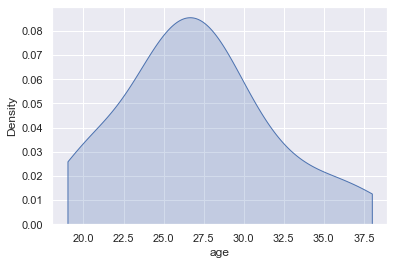

In [8]:
sns.kdeplot(df['age'], shade=True, cut=0);

### ECDF fonction de répartition Empirique
l existe trois principaux types de graphiques pour analyser la distribution d'une variable continue; en plus des histogrammes et des estimations de la densité par noyaux (kde), vous pouvez également afficher les fonctions de répartitions cumulées empiriques (ECDF pour empirical cumulative distribution functions).

Une ECDF représente la proportion (ou le nombre) d'observations inférieures à chaque valeur unique dans un ensemble de données. Par rapport à un histogramme ou à une courbe de densité, elle présente l'avantage de visualiser directement chaque observation, ce qui signifie qu'il n'y a pas de paramètres à ajuster. Elle permet également de comparer directement différentes distributions sur le même graphique.

En revanche, les relations entre l'apparence de la courbe et les propriétés de base de la distribution (telles que sa tendance centrale, sa variance et la présence d'une bimodalité) sont moins évidentes.

- (h) Afficher la fonction de répartition empirique de la variable age.

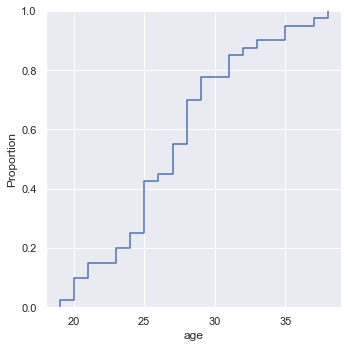

In [9]:
sns.displot(df.age, kind='ecdf');

## 2 - Variable discrète => countplot()
Lorsque la variable à analyser est une variable qualitative, c'est-à-dire discrète ou catégorielle, il est possible d'analyser sa distribution à l'aide d'un diagramme en barre.

Ce graphique est obtenu simplement grâce à la fonction countplot de Seaborn, qui accepte dans l'argument x une séquence de valeurs catégorielles discrètes, ou le nom de la variable, si l'on précise le nom du DataFrame qui la contient dans l'argument data.

Exemple :
sns.countplot(x=df['nom_var'])
sns.countplot(x='nom_var', data=df) # équivalent

Pour afficher horizontalement le diagramme, il suffit de rentrer la variable dans l'argument y et non x.
- (i) Visualiser le nombre de joueurs appartenant à chaque catégorie de la variable 'po' de df.

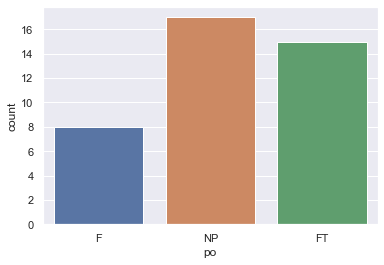

In [10]:
sns.countplot(x=df.po);

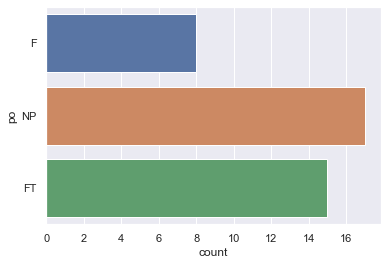

In [11]:
sns.countplot(y=df.po);

Si l'on souhaite calculer le nombre d'individus correspondant à chaque modalité d'une variable, selon son appartenance à une autre variable, on utilise l'argument hue.

Cet argument, très utile sur Seaborn, permet de faire varier chaque type de graphique en fonction d'une autre variable catégorielle.

Exemple :
sns.countplot(x='var1', hue='var2', data=df);
- (j) Visualiser le nombre de joueurs appartenant à chaque catégorie de la variable 'po', en fonction des différents postes (variable 'pos').

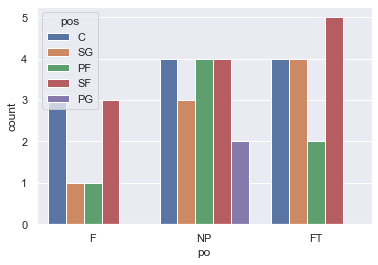

In [12]:
sns.countplot(x=df.po, hue=df.pos);

In [13]:
"--------------------------------------------------------------------------------------------------------------------------------------------------------------------"

'--------------------------------------------------------------------------------------------------------------------------------------------------------------------'

## B - Analyse statistique multivariée

## 3 - Relation entre plusieurs variables quantitatives 
### relplot()
La visualisation est une étape importante voire nécessaire de l'analyse de la relation entre deux ou plusieurs variables.

Pour représenter visuellement la relation entre deux variables, les méthodes les plus fréquentes sont les nuages de points (scatterplot) et les tracés de courbes (lineplot).

Dans la suite de l'exercice nous utiliserons la fonction relplot qui utilise l'une ou l'autre de ces fonctions, et permet de surcroît de générer plusieurs graphes.
Par défaut, la fonction relplot affiche un nuage de points. Elle prend comme arguments principaux un nom de variable dans x, un nom de variable dans y, et le nom du DataFrame utilisé dans data.

   Il est également possible d'entrer des variables / listes / séries directement dans les arguments x et y mais la méthode consistant à faire appel à un DataFrame est plus intuitive et permet plus de flexibilité.
- (a) Afficher un nuage de points entre les variables 'orb' et 'pts' de df.

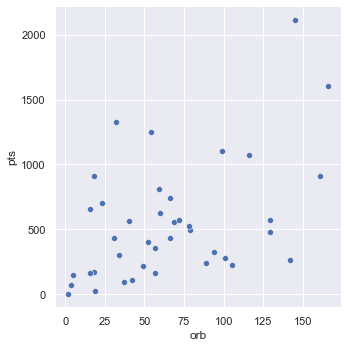

In [14]:
sns.relplot(x='orb', y='pts', data=df);  # est un scatterplot par défaut

Il est possible de rajouter jusqu'à 3 variables supplémentaires à ce graphique grâce aux arguments hue, size et style.

L'argument hue permet de différencier les points du graphique en les colorant en fonction d'une autre variable.
Si la variable est catégorielle, chaque modalité sera représentée par une couleur distincte.
Si la variable est quantitative continue, ses valeurs seront représentées par un dégradé de couleurs.
L'argument size opère de la même manière, la taille des points est modifiée en fonction d'une variable qualitative ou quantitative.
L'argument style crée des formes différentes pour chaque modalité d'une variable qualitative uniquement.
- (b) Afficher un nuage de points entre les variables 'pf' et 'stl' de df, colorés en fonction de la variable 'po'.

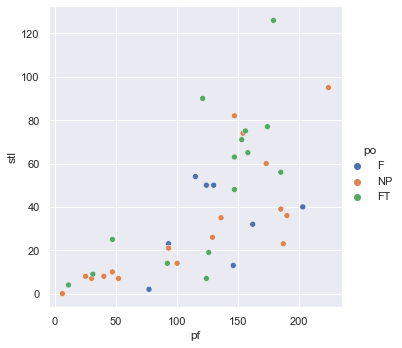

In [15]:
sns.relplot(x=df.pf, y=df.stl, data=df, hue=df.po);  # sns.relplot(x='pf', y='stl', hue='po', data=df); marche aussi

(c) Afficher un nuage de points entre les variables 'mp' et 'age' de df, avec des points de formes distinctes en fonction de la variable 'pos', de tailles qui dépendent de la variable 'po' et de couleur fixée par la variable 'age'.

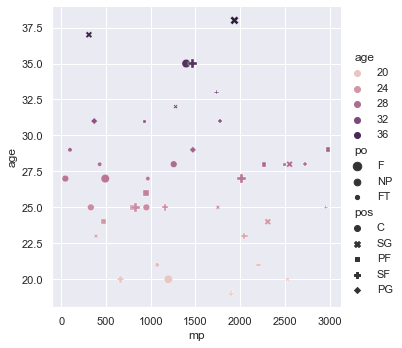

In [16]:
sns.relplot(x='mp', y='age', data=df, style='pos', size='po',hue='age');

Pour afficher une **courbe de relation entre deux variables continues**, il suffit d'ajouter l'argument kind='line' à la fonction relplot (par défaut kind='scatter').

- (d) Afficher une courbe décrivant l'évolution de la variable 'pf en fonction de la variable 'gs'.

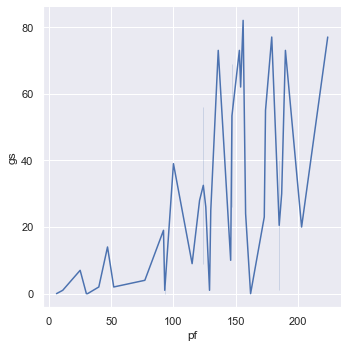

In [17]:
sns.relplot(x='pf', y='gs', data=df, kind='line');

**Par défaut, la fonction ordonne les points de manière croissante par rapport à la variable en abscisse**.

- (e) Afficher une courbe entre les variable g et pf des individus appartenant à df ayant joué plus de 60 matchs durant la saison (df[df['g']>60]).

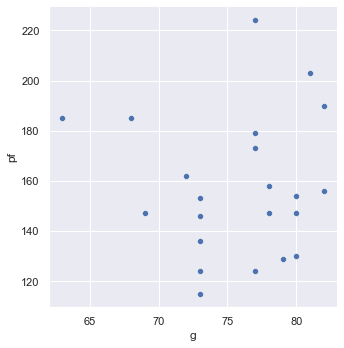

In [18]:
sns.relplot(x='g', y='pf', data=df[df['g']>60] ); # mettre le filtrage boolean dans data = 

**Par défaut, lorsque plusieurs points partagent les mêmes coordonnées en abscisse, la fonction crée un intervalle de confiance**; affiché comme une ombre autour de la courbe.
Pour la supprimer, il suffit de régler le **paramètre ci = None** .

Les arguments hue, size et style fonctionnent comme pour les nuages de points, mais créent une courbe différente pour chaque modalité de la variable séparatrice.

- (f) Afficher le même graphique que précédemment, mais sans intervalle de confiance, et en ajoutant une courbe par modalité de la variable 'po'.
- => veut dire qu'il faut aussi colorier en fonction des modes de 'po'

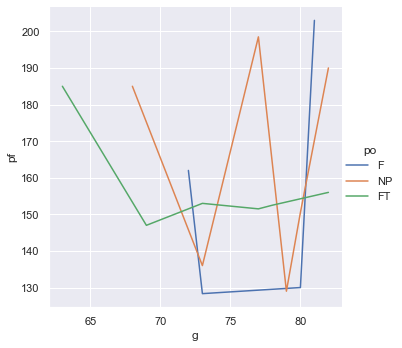

In [19]:
sns.relplot(x='g', y='pf', data=df[df['g']>60], ci=None, kind='line', hue='po');

L'un des principaux avantages de la fonction relplot est qu'elle construit un **objet FacetGrid par défaut**, qui permet d'afficher plusieurs graphiques à l'intérieur d'une même figure très facilement.

Les arguments row et col permettent ainsi de rajouter jusqu'à deux variables supplémentaires aux graphes, en créant plusieurs graphiques, séparés par rapport à une variable catégorielle le long de l'axe horizontal et/ou vertical.

- (g) Afficher plusieurs nuages de points représentant le nombre de points marqués en fonction du nombre de matchs joués, colorés en fonction du poste des joueurs et séparés par colonnes en fonction de la variable 'po'.

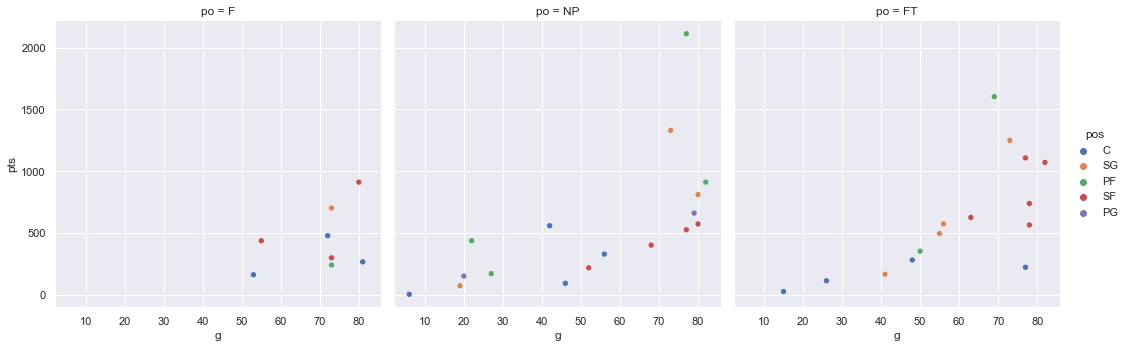

In [20]:
sns.relplot(x='g', y='pts', hue='pos', col='po', data=df);

- (h) Afficher des courbes de relation entre le nombre de minutes jouées ('mp') et le nombre de fautes personnelles commises('pf'), de styles et de couleurs différents en fonction du poste des joueurs ('pos'), séparées par lignes en fonction des conférences ('conf'), et par colonnes en fonction du niveau des équipes dans la compétition ('po').
- Il est parfois utile de modifier la taille du/des graphique(s) à l'intérieur de la figure, à l'aide du paramètre height

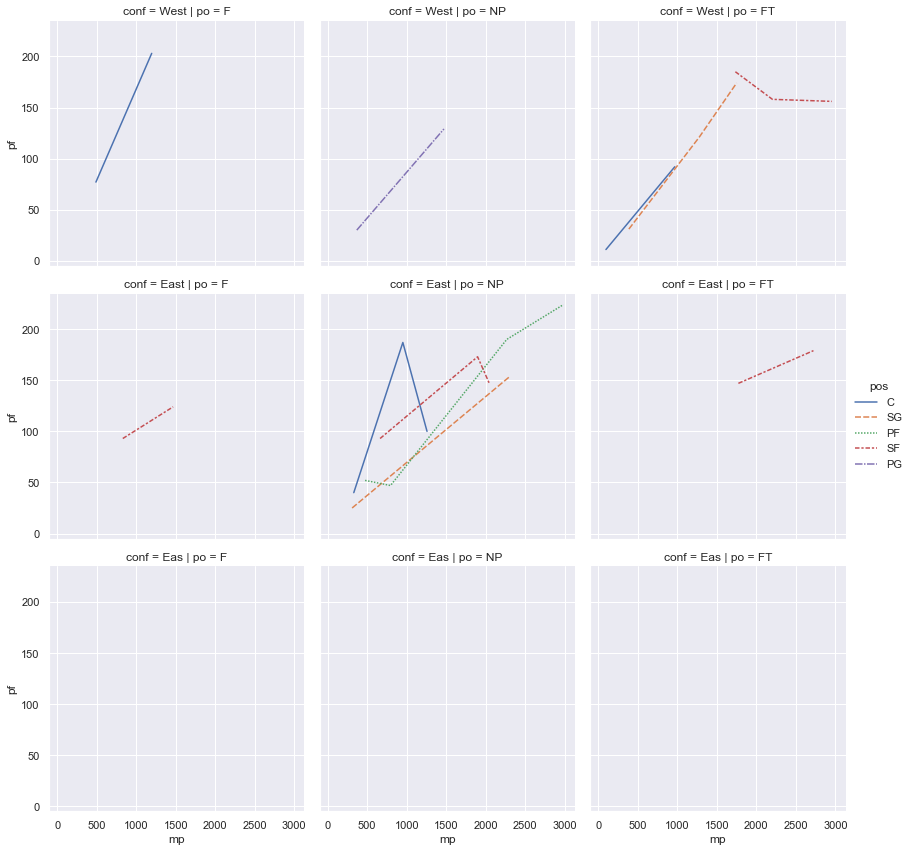

In [21]:
sns.relplot(x='mp', y='pf', kind='line', style='pos', hue='pos', data=df, row='conf', col='po', height=4);
# courbe de relation kind='line', style ok, coleur=hue, séparées en ligne = row, en colonne = col et height=réduit ou augment taille du graph total

Si le nombre de **modalités d'une variable est élevé**, il est alors plus facile de visualiser les différents graphes séparés selon ces modalités, à la fois sur les lignes et les colonnes.

Pour cela, **lorsqu'on divise les graphiques par colonnes**, il est possible de rajouter le **paramètre col_wrap=k** pour indiquer le **nombre de colonnes maximal k** que l'on souhaite afficher par ligne.
Si le nombre de modalités est supérieur à k, les graphiques correspondant aux k premières modalités seront affichés sur la première ligne, les suivants sur la seconde, etc..

   Le paramètre col_wrap n'est pas compatible avec le paramètre row.
- (i) Afficher les mêmes courbes que précédemment (x='mp', y='pf', style='pos', hue ='pos'), mais en séparant les graphiques en fonctions de la colonne 'pos' et en gardant au maximum 3 graphiques par ligne.

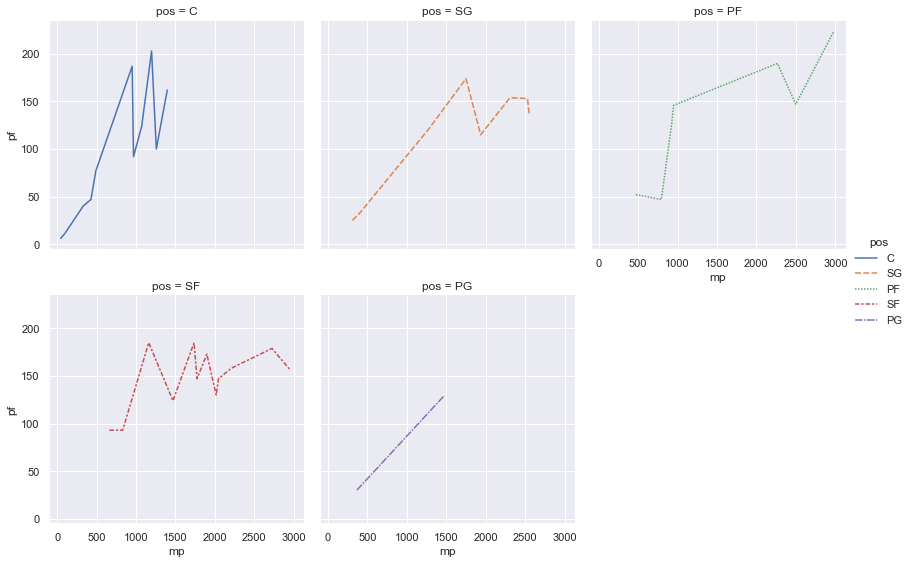

In [22]:
sns.relplot(x='mp', y='pf', kind='line', style='pos', hue='pos', data=df, col='pos', height=4, col_wrap=3);
# on demande ici col='pos' et non 'po', on enlève row et garde col + rajoute col_wrap limité à 3 graphs par lignes

In [23]:
" ------------------------------------------------------------------------------------------------------------------------------------------------------------------- "

' ------------------------------------------------------------------------------------------------------------------------------------------------------------------- '

### lmplot)(   pairplot()   heatmap()
Pour vérifier une <span style="color:GreenYellow">hypothèse de linéarité entre deux variables</span> , une solution rapide est d'afficher un nuage de points et la courbe de régression associée, calculée automatiquement grâce à la fonction lmplot.

Elle s'utilise de la même manière que la fonction scatterplot, et lorsque l'on dissocie les points selon une autre variable, le graphique affiche autant de courbes de régression que de catégories contenues dans la variable.

- (a) Afficher un nuage de points et une droite de régression entre les variables 'mp' et 'tov', colorer les points en fonction de la variable 'po'.

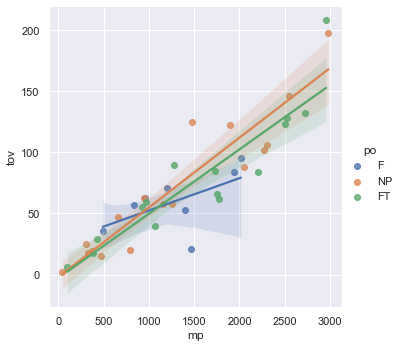

In [24]:
sns.lmplot(x='mp', y='tov', data=df, hue='po');

Par défaut, la courbe affichée est une <span style="color:GreenYellow">droite de régression</span>.
Pour obtenir une courbe plus lisse, obtenue par  <span style="color:GreenYellow">régression locale (régression LOWESS)</span> , il suffit d'ajouter l'argument lowess=True.

Il est possible également, par exemple, de préférer visualiser une courbe de régression polynomiale d'ordre 2 (aussi appelée régression quadratique), dans ce cas, l'argument à ajouter est order=2.

- (b) Afficher une courbe de régression au choix entre les variables 'ast' et 'tov'.

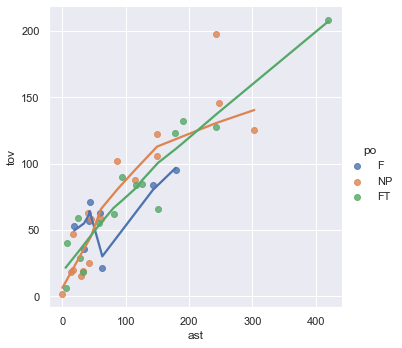

In [25]:
sns.lmplot(x='ast', y='tov', data=df, hue='po',lowess=True);
# les régression locales ne sont pas des droites !!!

Pour visualiser dans un même graphique les nuages de points entre  <span style="color:GreenYellow">chaque paire de variables quantitatives</span>  d'un dataset ainsi que la distribution propre de chaque variable en diagonale, l'appel à la fonction <span style="color:GreenYellow">pairplot</span> de Seaborn, est recommandé.

Les nuages de points peuvent être colorés en fonction d'une variable supplémentaire grâce au paramètre hue, et les distributions présentes sur la diagonale peuvent être représentées par des histogrammes ou des estimations de la densité, en fonction de l'argument entré dans diag_kind (hist ou kde).

- (c) Afficher dans un graphique les nuages de points entre chaque paire de variables quantitatives, ainsi que les densités estimées sur la diagonale, parmi 5 variables au choix de df.

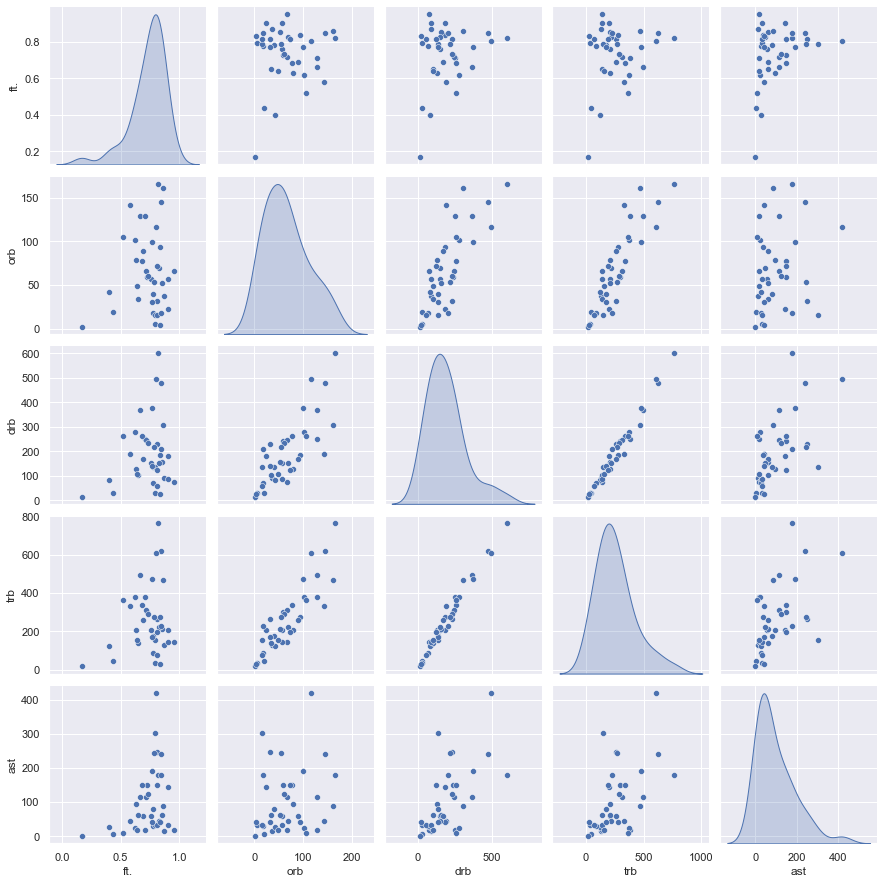

In [26]:
sns.pairplot(df.iloc[:,8:13], diag_kind='kde');
# col 8 à 12 de type float64 ou int64 => 5 cols
# d'où matrice 5x5 de scatterplot avec kernel en diagonale

### Matrice thermique=> heatmap()
Un bon moyen de mesurer les relations entre chaque paire de variables quantitatives peut-être de visualiser une heat map de la matrice de corrélation.
Une heat map permettra de repérer visuellement, à l'aide d'un dégradé de couleurs, les variables les plus corrélées.

La matrice de corrélation s'obtient facilement à partir d'un DataFrame, grâce à la méthode corr().
Une fois cette matrice obtenue, il suffit de la donner en argument à la fonction heatmap de Seaborn.
Pour ajouter les valeurs sur la heat map, on ajoute l'argument annot=True.

- (d) Afficher la heat map des corrélations de toutes les variables quantitatives de df.
- (e) Utiliser la colormap cmap de votre choix parmi les palettes de couleurs proposées par seaborn

sns.heatmap(df.corr());

### Remarque Figure & Axes matplotlib 
Comme souligné, au début de la formation, Seaborn utilise principalement les objets et fonctions de Matplotlib. Ainsi, si l'on veut modifier manuellement la taille d'une figure, on peut générer des objets Figure et Axes comme sur Matplotlib puis préciser dans l'argument ax d'une fonction Seaborn le nom de l'objet Axes sur lequel afficher le graphique.
- Exemple : 
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x=var, ax=ax)

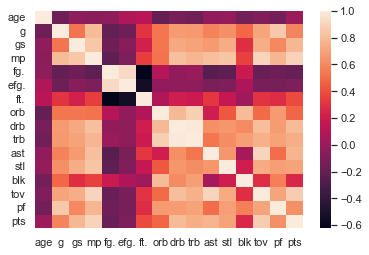

In [32]:
sns.heatmap(df.corr());

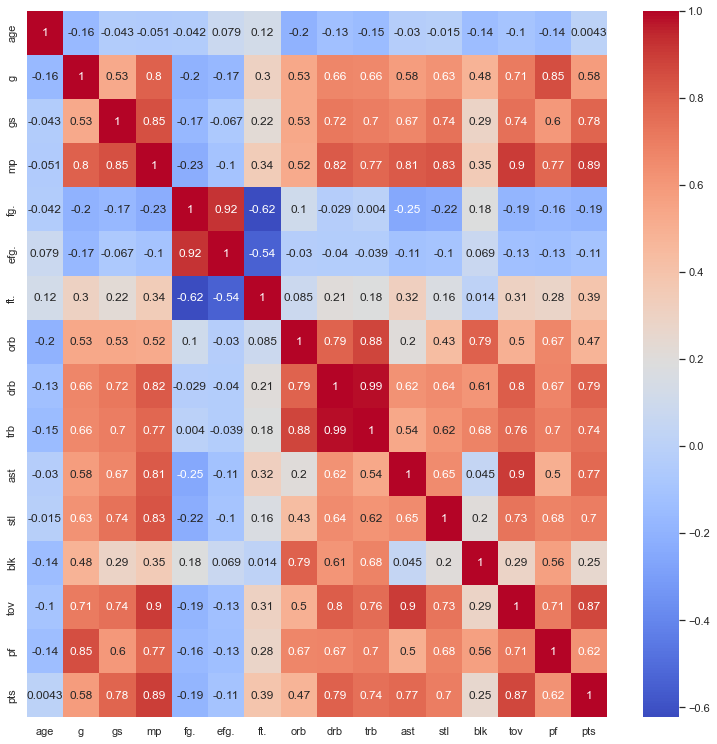

In [29]:
cor = df.corr()

fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');
# les variables catégorielles sont automatiquement exclues de la map : ici 16 var num sur 20 en tout

# QUESTION / COMMENT SORTIR LES RETURNS D ANALYSE DE TOUS CES GRAPH +> A VOIR !!!

## C -Analyse multivariée : catégories & numériques

Lorsque l'on veut étudier la relation <span style="color:GreenYellow"> entre une variable qualitative et une variable quantitative</span> , l'analyse statistique s'effectue souvent sur les p groupes d'observations déterminés par les p modalités de la variable qualitative.

Pour la visualisation d'une telle relation, il existe dans Seaborn une fonction appelée catplot permettant de générer différents graphiques qui impliquent des variables catégorielles.

### catplot() => strip plot = nuage en bandes
Par défaut, le graphique affiché est un strip plot : un nuage de points en bandes, chaque bande représentant une modalité de la variable catégorielle.

Pour avoir un graphique vertical, le nom de la variable catégorielle doit être donné à l'argument x et le nom de la seconde variable à l'argument y.
Pour obtenir un graphique horizontal, c'est l'inverse.

- (a) Afficher un strip plot permettant de visualiser le nombre de points marqués par les joueurs, en fonction de leurs postes (variable pos).

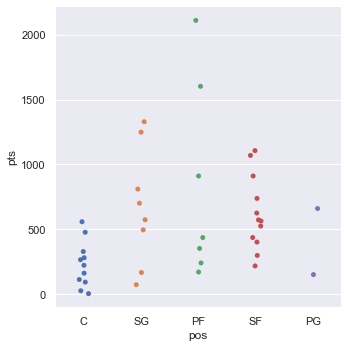

In [31]:
sns.catplot(x='pos', y='pts', data=df);
# 'pos' est qualitatif , 'pts' est quantitatif => strip plot par défaut avec catplot()

Pour obtenir des  <span style="color:GreenYellow">bandes avec des points qui ne se chevauchent pas</span> , on préfère afficher un swarm plot, qui permet d'avoir une meilleure idée de la distribution de la variable qualitative.

Pour l'obtenir, il suffit de donner l'argument  <span style="color:GreenYellow">kind ='swarm'</span>  à la fonction catplot.

- (b) Afficher un graphique similaire au précédent, mais en utilisant un swarm plot, et en colorant les points en fonction de la conférence à laquelle ils appartiennent.

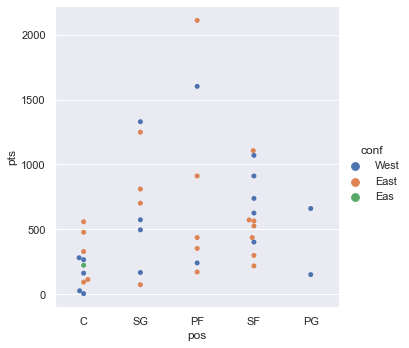

In [33]:
sns.catplot(x='pos', y='pts', data=df, kind='swarm', hue='conf');
# swarm = essaim,  var'conf' = conférence d'appartenant pour groupement de couleur par hue

Un des graphiques les plus utilisés et recommandé pour les variables catégorielles est la boîte à moustache (ou boxplot).  
L'argument  <span style="color:GreenYellow">kind='box'</span>  permet d'afficher un graphique composé de boîtes à moustaches, une pour chaque modalité de la variable qualitative.

- (c) Afficher un graphique en boîtes à moustaches à partir des mêmes variables que précédemment, séparées le long des colonnes en fonction de la variable 'po'.

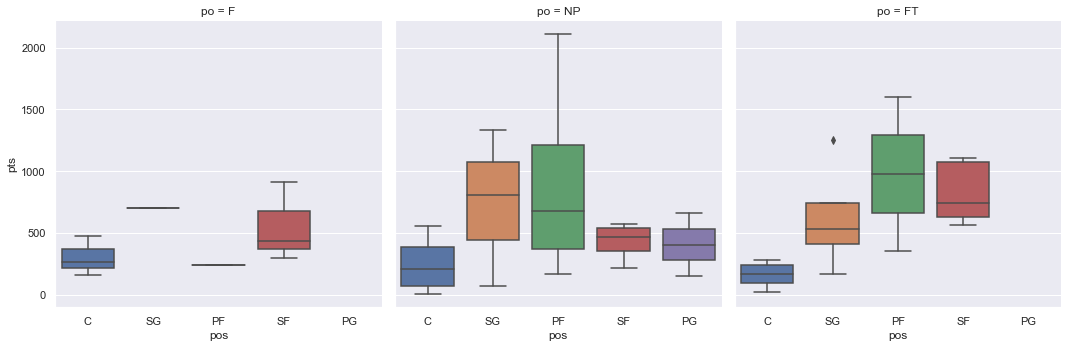

In [34]:
sns.catplot(x='pos', y='pts', kind='box', col='po', data=df);
# 'po' a 3 catégories => 3 boxplot en lignes autom. avec col=

- (d) Afficher un graphique en boîtes à moustaches, colorées en fonction du champ 'conf'.

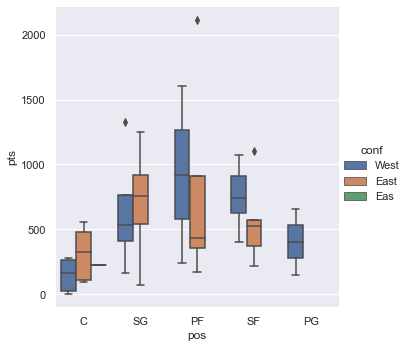

In [35]:
sns.catplot(x='pos', y='pts', hue='conf', kind='box', data=df);
# boxplot cote à cote car hue='conf' a 2 catégories

L'argument  <span style="color:GreenYellow">kind='boxen'</span> , permet d'afficher des boxplots visuellement améliorés, et surtout plus utiles avec des données de grande dimension.

- (e) Afficher un graphique en boîtes à moustaches en utilisant l'argument kind='boxen'.

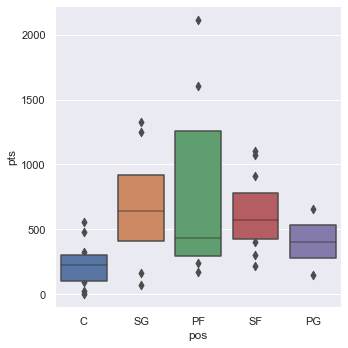

In [36]:
sns.catplot(x='pos', y='pts', kind='boxen', data=df);
# boxplot améliorés par 'boxen'

Un autre type de graphique est le graphique en 'violons', similaire au boxplot mais qui en plus de donner une idée de la distribution de la variable en fonction des différentes modalités de la variable catégorielle, ajoute une estimation par noyau de la densité de cette distribution.
Ces graphiques sont obtenus grâce à l'argument  <span style="color:GreenYellow">kind='violin'</span> .

- (f) Afficher les graphiques en violons, à partir des variables 'pos' et 'stl'.

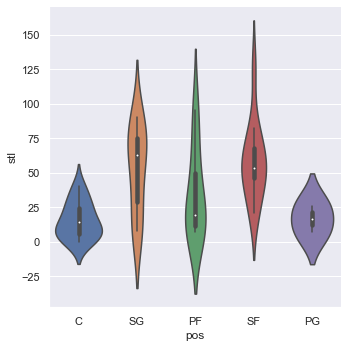

In [37]:
sns.catplot(x='pos', y='stl', kind='violin', data=df);

Comme pour les boxplots, l'argument **hue** permet de créer un 'violon' par modalité de la variable en abscisse et par modalité d'une variable supplémentaire.  
**Cependant**, lorsque cette variable supplémentaire contient exactement 2 modalités, l'ajout du paramètre  <span style="color:GreenYellow">split=True</span>  permet de séparer directement les violons en 2.

- (g) Afficher un graphique en violons à partir des variables 'pos' et 'trb', en séparant les violons en fonction de la variable 'conf'.

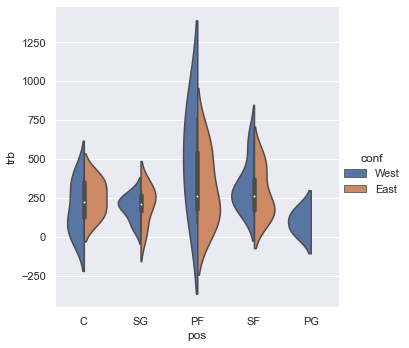

In [42]:
sns.catplot(x='pos', y='trb', hue='conf', split=True, kind='violin', data=df);
# hue color par catégorie, si que 2 cat. alors split=True sépare en 2 les violons

Pour  <span style="color:GreenYellow"> superposer deux graphiques</span> au sein d'une même figure,   
il est possible d'utiliser l'<span style="color:GreenYellow"> attribut ax d'un objet retourné par seaborn</span>, afin de l'indiquer comme axe au nouveau graphique créé.

- Exemple :
### 2 graphes superposés catplot() + swarmplot() avec G1=sns. et ax dans G2=sns
p = sns.catplot(x='var1', y='var2', data=df)  
sns.swarmplot(x='var1', y='var2', data=df, ax=p.ax)   
l'argument ax=p.ax permet de superposer les graphiques  
- (h) À partir des variables 'pos' et 'pf', afficher un graphique en violons d'intérieur vide (inner=None)   
puis ajouter à l'intérieur les points (de taille 3, de couleur noire et d'opacité 0.7) obtenus par la fonction swarmplot.

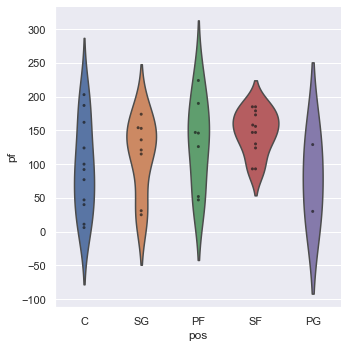

In [46]:
G1 = sns.catplot(x='pos', y='pf', kind='violin', inner=None, data=df)
sns.swarmplot(x='pos', y='pf', size=3, color='k', alpha=0.7, data=df, ax=G1.ax);
# noter l'appel de G1 par ax=G1.ax dans G2, et inner=None=intérieur vide

Un type de graphique supplémentaire efficace pour l'analyse de la relation entre une variable qualitative et une variable quantitative  
est le  <span style="color:GreenYellow">graphique en barres (kind='bar')</span>  qui permet d'afficher une barre pour chaque modalité d'une variable,  
dont la hauteur varie en fonction d'une variable quantitative.

L'ajout d'une variable catégorielle supplémentaire à l'argument hue permet de multiplier le nombre de barres par le nombre de modalités de cette variable.

- (i) Afficher un bar plot du pourcentage de rebond offensif (variable 'orb') en fonction de la conférence dont font partie les joueurs, ainsi que de leurs performances dans les playoffs ('po').

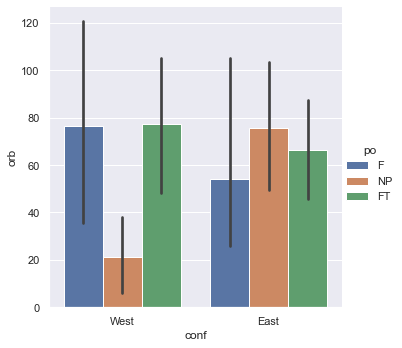

In [47]:
sns.catplot(x='conf', y='orb', hue='po', kind='bar', data=df);
# noter var cat en x, var num en y, var cat z en hue + kind='bar' => cat z couleur + barres de z dans x selon y

## D - Graphiques Multiples  FacetGrid()   map()

FacetGrid
La  <span style="color:GreenYellow">classe FacetGrid</span>  se révèle très utile lorsque l'exploration d'un jeu de données nécessite de <span style="color:GreenYellow">visualiser la distributionn d'une variable ou une relation  
    entre plusieurs variables, à l'intérieur de sous-ensembles des données</span>  
Les objets FacetGrid sont des Figures multi-dimensionnelles de Matplotlib qui permettent d'afficher des graphiques à partir  
de sous-ensembles de données divisés par lignes (row), par colonnes (col) et par une troisième dimension grâce à l'argument hue.

La majorité des fonctions utilisées dans ce tutoriel (relplot, catplot, lmplot) utilisent et retournent des objets FacetGrid directement,  
mais il est possible d'instancier ce type de graphiques manuellement afin de créer des graphiques particuliers et personnalisés.

Pour créer une figure multi-graphiques à l'aide de la fonction FacetGrid, il suffit de lui donner en argument le nom du dataset et  
des variables à utiliser sur une ou plusieurs des 3 dimensions. Les variables doivent être catégorielles ou discrètes.
Une grille est ainsi créée et pour chaque variable utilisée le long d'un axe, la grille sépare les différents graphiques selon  
les modalités prises le long de cet axe.

Pour ajouter un graphique à chaque case de la grille ainsi créée, on utilise la méthode map à l'intérieur de laquelle on indique  
la fonction à utiliser et les différents paramètres à régler.

g = sns.FacetGrid(df, row='var1')    
**on crée autant de sous-graphiques que la variable var1 possède de valeurs**  
g.map(plt.scatter, 'var2', 'var3', s=5, alpha=.5, color='red')**    
**on affiche des nuages de points entre var2 et var3, dans chacun des sous-graphiques**  
- (a) En utilisant la fonction FacetGrid, afficher un graphique composé de deux colonnes, différenciant les joueurs en fonction   
de leur conférence, et afficher dans chacun des deux graphes l'histogramme de la variable 'age'.

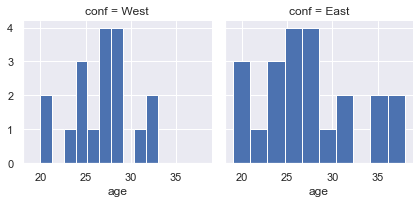

In [48]:
# On affecte au graph g la variable 'conf' en FaceGrid
g = sns.FacetGrid(df, col='conf')
# sur g on map la fonction hist() de la var 'age' de matplotlib
g.map(plt.hist, 'age')

- (b) En utilisant la fonction FacetGrid, afficher un graphique contenant les nuages de points entre les variables 'mp' et 'ft.',  
séparés sur une grille par la variable 'po' en colonnes, la variable 'pos' en lignes, avec les points colorés en fonction de la variable 'conf'.

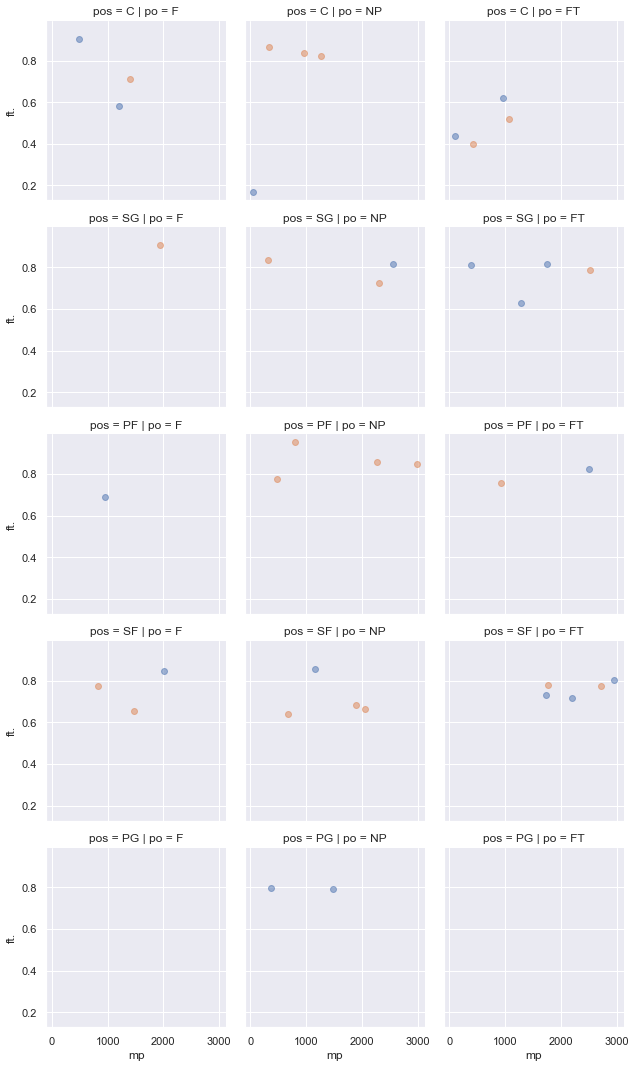

In [49]:
# g définit par FacetGrid sur df, 'po' (3 class=> 3cols) et 
# 'col' (4 class=> 4 linges) avec coloraison 'conf' (2 class=> 2 colors)
g = sns.FacetGrid(df, col='po', row='pos', hue='conf');
# ne jamais mettre x= et y= dans map
g.map(plt.scatter,'mp','ft.', alpha=0.5);

### PairGrid()
Tout comme FacetGrid, PairGrid permet de créer des  <span style="color:GreenYellow"> grilles multi-figures contenant le même type de graphique</span> grilles multi-figures contenant le même type de graphique, pour visualiser rapidement un jeu de données.

Cependant, à l'inverse d'un FacetGrid dans lequel chaque case représente la même relation mais selon les différentes modalités  
d'une ou de plusieurs variables, <span style="color:GreenYellow">dans un PairGrid, chaque ligne et chaque colonne correspondent à une variable différente.</span>    
Ainsi chaque case relie un couple de variables et permet de visualiser les relations entre chaque paire de variables d'un dataset.

La fonction pairplot vue au cours de la formation utilise et retourne un objet PairGrid.

La fonction PairGrid n'a besoin que du nom du dataset pour initialiser la grille. Elle peut également contenir différents paramètres 
comme une variable catégorielle dans l'argument hue pour colorer les graphiques en fonction de ses modalités.

La méthode map est ensuite appelée pour remplir les cases de la grille avec un type de graphique.   
Afin d'afficher des types de graphiques différents sur la diagonale de la grille, les méthodes map_diag et map_offdiag peuvent être  
utilisées à la place, pour sélectionner respectivement le type de graphique à visualiser sur la diagonale et en dehors.

(c) Afficher un nuage de points entre chaque paire de variables quantitatives parmi les colonnes 14 à 20 de df. Les points seront colorés 
selon les modalités de la variable 'po', et d'opacité 0.6.
(d) Grâce à une commande Matplotlib, ajouter les légendes.

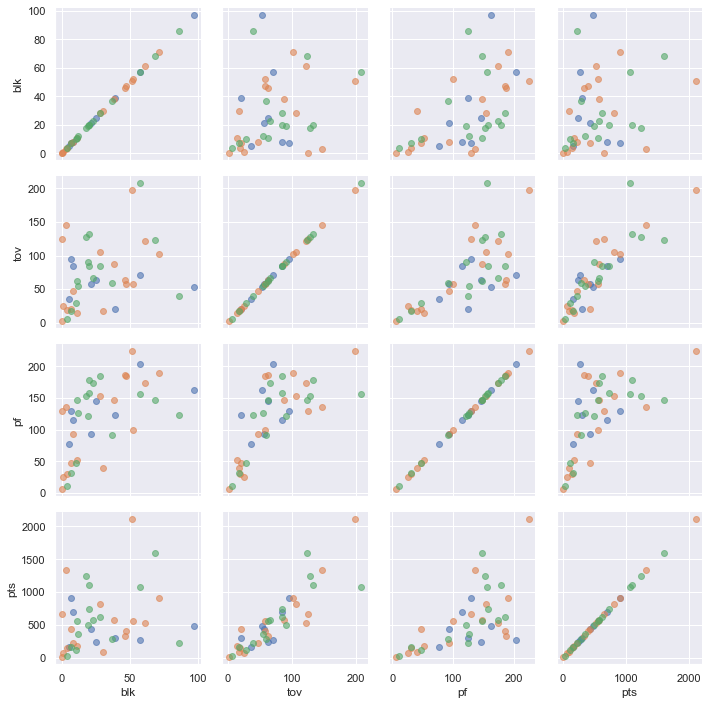

In [51]:
# g prend les paires de colonnes(PairGrid) par df.iloc et var color par hue
g = sns.PairGrid(df.iloc[:,14:21], hue='po')
# pas de variable dans map, jsute scatter de matplotlib et opacité
g.map(plt.scatter, alpha=0.6)
# affiche legende pour colorisation hue
g.add_legend()

### map_diag()  -   map_offdiag   -  kdeplot()
- map_diag = Tracé avec une fonction univariée sur chaque sous-parcelle diagonale. (color et label ok)
- map_offdiag = Parcelle avec une fonction bivariée sur les sous-parcelles hors diagonale. (color et label ok)  
- (e) Afficher dans un PairGrid des colonnes 1 à 5 de df, la courbe de densité estimée de chaque variable,     
ainsi que la densité bivariée estimée entre chaque paire de variable sur 6 niveaux à l'aide de la **fonction kdeplot.**

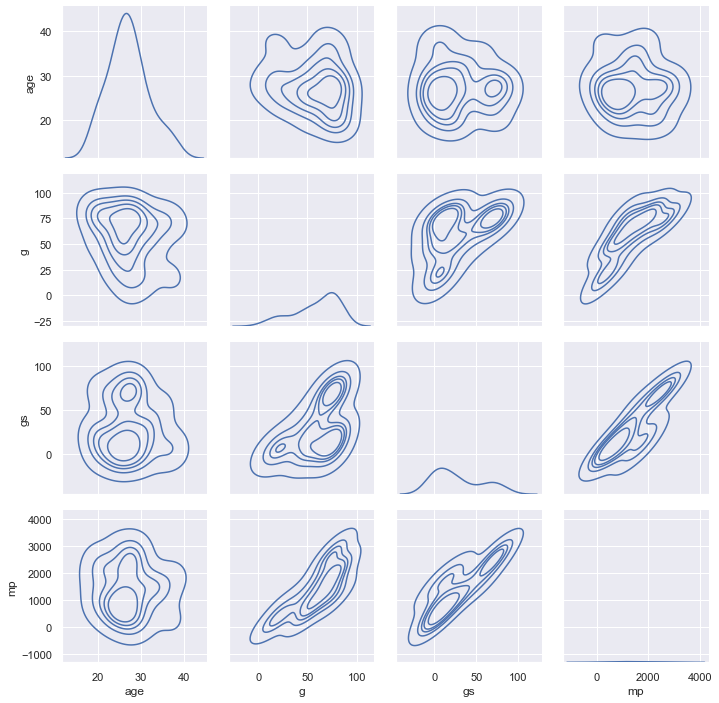

In [53]:
# g prend les paires de colonnes(PairGrid) par df.iloc
g = sns.PairGrid(df.iloc[:,1:6]);
# map_diag pour tracer avec une fct° univariée sur chaque sous-parcelles diagonales
g.map_diag(sns.kdeplot);
# map_offdiag parcelle avec fct° bivariée sur sous-parcelles hors diagonale
g.map_offdiag(sns.kdeplot, n_levels=6);